# Reading iris dataset

In [17]:
from sklearn import datasets
import pandas as pd
import numpy as np

from sklearn.tree import export_graphviz
import pydotplus

data = datasets.load_iris()
content = data.data
target  = data.target

# Display dataset
print(pd.DataFrame(data = np.c_[content, target], columns = data.feature_names + ['target']))


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
5                  5.4               3.9                1.7               0.4   
6                  4.6               3.4                1.4               0.3   
7                  5.0               3.4                1.5               0.2   
8                  4.4               2.9                1.4               0.2   
9                  4.9               3.1                1.5               0.1   
10                 5.4               3.7                1.5               0.2   
11                 4.8      

# Reading 'play tennis' dataset  from .csv

In [18]:
tennis = pd.read_csv("play-tennis.csv")
print(tennis)

     outlook temperature humidity   wind playtennis
0      sunny         hot     high  False         no
1      sunny         hot     high   True         no
2   overcast         hot     high  False        yes
3       rain        mild     high  False        yes
4       rain        cool   normal  False        yes
5       rain        cool   normal   True         no
6   overcast        cool   normal   True        yes
7      sunny        mild     high  False         no
8      sunny        cool   normal  False        yes
9       rain        mild   normal  False        yes
10     sunny        mild   normal   True        yes
11  overcast        mild     high   True        yes
12  overcast         hot   normal  False        yes
13      rain        mild     high   True         no


# Learning iris dataset with full training 
## NaïveBayes

In [19]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

GNBlearn = gnb.fit(content, target)

prob_class = gnb.class_prior_
print("Probability of each class: ")
print(data.target_names)
print(prob_class)

print()

feature_mean = gnb.theta_
print("Means of attribute of every class: ")
print(pd.DataFrame(data = np.c_[feature_mean], columns = data.feature_names))

print()

feature_variance = gnb.sigma_
print("Variance of attribute of every class: ")
print(pd.DataFrame(data = np.c_[feature_variance], columns = data.feature_names))


Probability of each class: 
['setosa' 'versicolor' 'virginica']
[0.33333333 0.33333333 0.33333333]

Means of attribute of every class: 
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0              5.006             3.418              1.464             0.244
1              5.936             2.770              4.260             1.326
2              6.588             2.974              5.552             2.026

Variance of attribute of every class: 
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.121764          0.142276           0.029504          0.011264
1           0.261104          0.096500           0.216400          0.038324
2           0.396256          0.101924           0.298496          0.073924


## Decision Tree ID3

In [22]:
from sklearn import tree


ID3learn = tree.DecisionTreeClassifier(criterion="entropy")
ID3learn.fit(content, target)

# dot_data = tree.export_graphviz(ID3learn, out_file=None, 
#                          feature_names=data.feature_names,  
#                          class_names=data.target_names,  
#                          filled=True, rounded=True,  
#                          special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## K-Nearest Neighbor

Automatically created module for IPython interactive environment


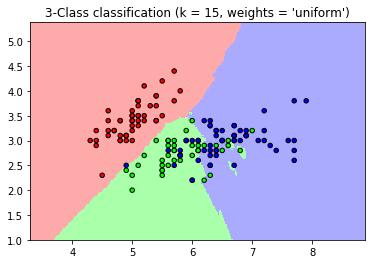

In [23]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# Take only the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = content[:, :2]
y = target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Create an instance of Neighbours Classifier and fit the data.
KNNlearn = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
KNNlearn.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = KNNlearn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')"
          % (n_neighbors, 'uniform'))

plt.show()

## Multi Layer Perceptron (MLP)

In [24]:
from sklearn.neural_network import MLPClassifier

MLPlearn = MLPClassifier(solver='lbfgs',
                hidden_layer_sizes=(5, 2))
MLPlearn.fit(content, target)

# Element[i,j] represents the weight of element-j on layer i
print("Weight Matrices: ")
print(MLPlearn.coefs_)
print()

# Element[i,j] represents the bias for element-j on layer i
print("Bias Vectors: ")
print(MLPlearn.intercepts_)

Weight Matrices: 
[array([[-0.708528  ,  0.43897675, -0.76305556, -0.62778552, -0.06787067],
       [-0.19017801,  0.08088255, -0.33455775,  0.30853217,  0.24644785],
       [ 0.43929434,  0.39827729, -0.01153832, -0.73515413, -0.70008283],
       [ 0.77761481,  0.05240732,  0.62344451,  0.77638739, -0.02228968]]), array([[-0.85332953,  0.27276523],
       [-0.71456297, -0.04868739],
       [-0.39187264,  0.22876236],
       [-0.51000698, -0.14349352],
       [-0.57756415,  0.75778076]]), array([[-0.86718869,  0.61018008,  0.30101134],
       [-0.98309191,  0.91288554,  0.26295175]])]

Bias Vectors: 
[array([-0.54566053, -0.06230607, -0.53045617,  0.03756891,  0.24719748]), array([-0.56186675, -0.5274471 ]), array([-0.33052925, -0.33040598, -0.33040089])]


# Learning iris dataset with split : train 90% & test 10% schema

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(content, target, test_size=0.1)

## NaïveBayes

In [26]:
from sklearn import metrics

GNBlearn.fit(X_train, y_train)
y_pred = GNBlearn.predict(X_test)

print("1. Accuracy: ", str(metrics.accuracy_score(y_test,y_pred) * 100) + "%")
print()

precision = metrics.precision_score(y_test, y_pred, average=None) * 100
print("2. Precision: ")
for i in range(3):
    print(data.target_names[i] + ": " + str(precision[i]) + "%")
print()
    
recall = metrics.recall_score(y_test, y_pred, average=None) * 100
print("3. Recall: ")
for i in range(3):
    print(data.target_names[i] + ": " + str(recall[i]) + "%")
print()

print("4. Confusion Matrix: ")
print(metrics.confusion_matrix(y_test, y_pred))

1. Accuracy:  93.33333333333333%

2. Precision: 
setosa: 100.0%
versicolor: 85.71428571428571%
virginica: 100.0%

3. Recall: 
setosa: 100.0%
versicolor: 100.0%
virginica: 85.71428571428571%

4. Confusion Matrix: 
[[2 0 0]
 [0 6 0]
 [0 1 6]]


## Decision Tree ID3

In [27]:
ID3learn.fit(X_train, y_train)
y_pred = ID3learn.predict(X_test)

print("1. Accuracy: ", str(metrics.accuracy_score(y_test,y_pred) * 100) + "%")
print()

precision = metrics.precision_score(y_test, y_pred, average=None) * 100
print("2. Precision: ")
for i in range(3):
    print(data.target_names[i] + ": " + str(precision[i]) + "%")
print()
    
recall = metrics.recall_score(y_test, y_pred, average=None) * 100
print("3. Recall: ")
for i in range(3):
    print(data.target_names[i] + ": " + str(recall[i]) + "%")
print()

print("4. Confusion Matrix: ")
print(metrics.confusion_matrix(y_test, y_pred))

1. Accuracy:  93.33333333333333%

2. Precision: 
setosa: 100.0%
versicolor: 85.71428571428571%
virginica: 100.0%

3. Recall: 
setosa: 100.0%
versicolor: 100.0%
virginica: 85.71428571428571%

4. Confusion Matrix: 
[[2 0 0]
 [0 6 0]
 [0 1 6]]


## K-Nearest Neighbor

In [28]:
KNNlearn.fit(X_train, y_train)
y_pred = KNNlearn.predict(X_test)

print("1. Accuracy: ", str(metrics.accuracy_score(y_test,y_pred) * 100) + "%")
print()

precision = metrics.precision_score(y_test, y_pred, average=None) * 100
print("2. Precision: ")
for i in range(3):
    print(data.target_names[i] + ": " + str(precision[i]) + "%")
print()
    
recall = metrics.recall_score(y_test, y_pred, average=None) * 100
print("3. Recall: ")
for i in range(3):
    print(data.target_names[i] + ": " + str(recall[i]) + "%")
print()

print("4. Confusion Matrix: ")
print(metrics.confusion_matrix(y_test, y_pred))

1. Accuracy:  93.33333333333333%

2. Precision: 
setosa: 100.0%
versicolor: 85.71428571428571%
virginica: 100.0%

3. Recall: 
setosa: 100.0%
versicolor: 100.0%
virginica: 85.71428571428571%

4. Confusion Matrix: 
[[2 0 0]
 [0 6 0]
 [0 1 6]]


# Learning iris dataset with 10-fold cross validatation schema
## NaïveBayes

In [11]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(GNBlearn, content, target, cv=10)

print()
for i in range(10):
    print("Fold-" + str(i + 1) + ":", "%0.2f" % score[i])
print()
print("Mean: %0.2f" % score.mean())
print("Accuration: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


Fold-1: 0.93
Fold-2: 0.93
Fold-3: 1.00
Fold-4: 0.93
Fold-5: 0.93
Fold-6: 0.93
Fold-7: 0.87
Fold-8: 1.00
Fold-9: 1.00
Fold-10: 1.00

Mean: 0.95
Accuration: 0.95 (+/- 0.09)


# Saving learning model/hypothesis into external file

In [31]:
from sklearn.externals import joblib

joblib.dump(KNNlearn, 'kNN.model')
joblib.dump(MLPlearn, 'MLP.model')
joblib.dump(GNBlearn, 'GNB.model')
joblib.dump(ID3learn, 'DT.model')

['DT.model']

# Reading model/hypothesis from external file

In [32]:
KNNlearn = joblib.load('kNN.model')
MLPlearn = joblib.load('MLP.model')
GNBlearn = joblib.load('GNB.model')
ID3learn = joblib.load('DT.model')

# Making new instances by assigning value to each attributes

In [33]:
newInstance = [3, 3.1, 1.2, 0.3]
newInstance  = np.array([newInstance ])
                
print("New Instance: ")
for i in range(4):
    print(data.feature_names[i] + ":", newInstance[0][i])

New Instance: 
sepal length (cm): 3.0
sepal width (cm): 3.1
petal length (cm): 1.2
petal width (cm): 0.3


# Classifying new instances data using NaïveBayes, DecisionTree, kNN, and MLP model/hypothesis

## NaïveBayes

In [34]:
print(data.target_names[GNBlearn.predict(newInstance)][0])

setosa


## DecisionTree

In [35]:
print(data.target_names[ID3learn.predict(newInstance)][0])

setosa


## K-Nearest Neighbor

In [36]:
print(data.target_names[KNNlearn.predict(newInstance)][0])

setosa


## Multi Layer Perceptron (MLP)

In [37]:
print(data.target_names[MLPlearn.predict(newInstance)][0])


virginica
